<div style="background-color:#CC615C;padding:20px;border-radius:10px;color:white;text-align:center;">
    <h1 style="color:white;font-size: 4.5em;font-weight:bold;line-height: 1.3;letter-spacing:1px;border: 4px solid #F0BA7C;padding:20px; text-shadow: -1px 0 black, 0 1px black, 1px 0 black, 0 -1px black;">Heart Disease Problem</h1>
    <div style="margin-top:20px;text-align:left;">
        <h2 style="color:white; font-size: 2.5em;font-weight:bold;letter-spacing:1px;border-bottom: 4px dashed #F0BA7C;padding-bottom:5px; text-shadow: -1px 0 black, 0 1px black, 1px 0 black, 0 -1px black;">Overview</h2>
        <p style="font-size:2em;margin-top:10px; text-shadow: 1px 0 black, 0 1px black, 1px 0 black, 0 1px black; color: white; letter-spacing:1px ">Here Is A General Steps Walked Thorugh Dataset And Tried Different Techniques!</p>
        <div>
        <ol style="font-size:2em;margin-top:10px;text-shadow: 1px 0 black, 0 1px black, 1px 0 black, 0 1px black;; color: white; letter-spacing:1px ">
            <li href = '#1'>Importing Data</li>
            <li href = '#2'>
                EDA
                <ul>
                    <li> Basic Exploration </li>
                    <li href ="#2.1"> Categorical Variables + Visualizations </li>
                    <li href ="#2.2"> Numerical Variables + Visualizations </li>
                    <li href ="#2.3"> Outliers Detection (using BoxPlot & LOF Algorithm) </li>
                    <li href ="#2.4"> Dimensionality Reduction (using PCA & t-SNE) </li>
                </ul>
            </li>
            <li>Feature Selection</li>
            <li>
                Modeling
                <ul>
                    <li> Using Pycaret </li>
                    <li> Using Sklearn </li>
                </ul>
            </li>
            <li>Model Explainability</li>
        </ol>
        </div>
    </div>
</div>


<body> 
        <h3 style="font-size: 2.3em;font-weight:bold;letter-spacing:1px;border-bottom: 5px dashed #F0BA7C;padding-bottom:5px; text-shadow: -1px 0 black, 0 1px black, 1px 0 black, 0 -1px black;">Columns Description</h3>
        <ol style="font-size:1.5em;margin-top:10px; letter-spacing:1px; font-weight:normal  ">
          <li>Age : age of the patient [years]</li>
          <li>Sex: sex of the patient [1: Male, 0: Female]</li>
          <li>ChestPainType: chest pain type [1: Typical Angina, 2: Atypical Angina, 3: Non-Anginal Pain, 4: Asymptomatic]</li>
          <li>RestingBP: resting blood pressure [mm Hg]</li>
          <li>Cholesterol: serum cholesterol [mm/dl]</li>
          <li>FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]</li>
          <li>RestingECG: resting electrocardiogram results [0: Normal, 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 2: showing probable or definite left ventricular hypertrophy by Estes' criteria]</li>
          <li>MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]</li>
          <li>ExerciseAngina: exercise-induced angina [1: Yes, 0: No]</li>
          <li>Oldpeak: oldpeak = ST [Numeric value measured in depression]</li>
          <li>ST_Slope: the slope of the peak exercise ST segment [1: upsloping, 2: flat, 3: downsloping]</li>
          <li>HeartDisease: output class [1: heart disease, 0: Normal]</li>
        </ol>
</body>

# <b id = "#1">1 <span style='color:#F0BA7C'>|</span> Importing Data</b>


In [2]:
!pip install pycaret -q 
from pycaret.classification import *


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pydocstyle 6.3.0 requires importlib-metadata<5.0.0,>=2.0.0; python_version < "3.8", but you have importlib-metadata 6.6.0 which is incompatible.
librosa 0.10.0.post2 requires soundfile>=0.12.1, but you have soundfile 0.11.0 which is incompatible.
ibis-framework 2.1.1 requires importlib-metadata<5,>=4; python_version < "3.8", but you have importlib-metadata 6.6.0 which is incompatible.
flake8 5.0.4 requires importlib-metadata<4.3,>=1.1.0; python_version < "3.8", but you have importlib-metadata 6.6.0 which is incompatible.
cmudict 1.0.13 requires importlib-metadata<6.0.0,>=5.1.0, but you have importlib-metadata 6.6.0 which is incompatible.


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
import seaborn as sns


from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA


from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, RobustScaler

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.feature_selection import RFE

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 


import shap



set_matplotlib_formats('svg')
plt.style.use('ggplot')
sns.set_style("whitegrid")
plt.rcParams['axes.edgecolor'] = 'black'

In [23]:
df = pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')

# <b id = "#2">2 <span style='color:#F0BA7C'>|</span> EDA</b>
<b> In this section what we will do: </b>
1. Basic Exploration
2. Check for Null & Duplicate Values
3. Dealing with Outliers
4. Visualize the Data

In [5]:
df

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N      0.0       Up             0  
1      156              N      1.0     Flat             1  
2       98              N      0.0       Up             0  
3      108              Y      1.5     Flat             1  
4      122              N      0.0       Up             0  
..     ...            ...      ...      ...           ...  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0  

[918 rows x 12 columns]

In [6]:
df.shape

(918, 12)

In [7]:
df.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

In [8]:
df.info() #checking dtypes and non null count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [9]:
df.isnull().sum() #checking sum of nulls

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [10]:
df = df.drop_duplicates()

In [11]:
df.shape

(918, 12)

## <b id = "#2.1">2.1 <span style='color:#F0BA7C'>|</span> Categorical Variables </b>
let's back from our description for each colum
* Sex: sex of the patient [1: Male, 0: Female]
* ChestPainType: chest pain type [1: Typical Angina, 2: Atypical Angina, 3: Non-Anginal Pain, 4: Asymptomatic]
* RestingECG: resting electrocardiogram results [0: Normal, 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 2: showing probable or definite left ventricular hypertrophy by Estes' criteria]
* ExerciseAngina: exercise-induced angina [1: Yes, 0: No]
* ST_Slope: the slope of the peak exercise ST segment [1: upsloping, 2: flat, 3: downsloping]

In [10]:
cat_cols = [ df.columns[i] for i, j in enumerate(df.dtypes) if j == 'object'] #extracting categorical data
print(cat_cols)

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [13]:
df_cat = df[cat_cols]
df_cat

Sex ChestPainType RestingECG ExerciseAngina ST_Slope
0     M           ATA     Normal              N       Up
1     F           NAP     Normal              N     Flat
2     M           ATA         ST              N       Up
3     F           ASY     Normal              Y     Flat
4     M           NAP     Normal              N       Up
..   ..           ...        ...            ...      ...
913   M            TA     Normal              N     Flat
914   M           ASY     Normal              N     Flat
915   M           ASY     Normal              Y     Flat
916   F           ATA        LVH              N     Flat
917   M           NAP     Normal              N       Up

[918 rows x 5 columns]

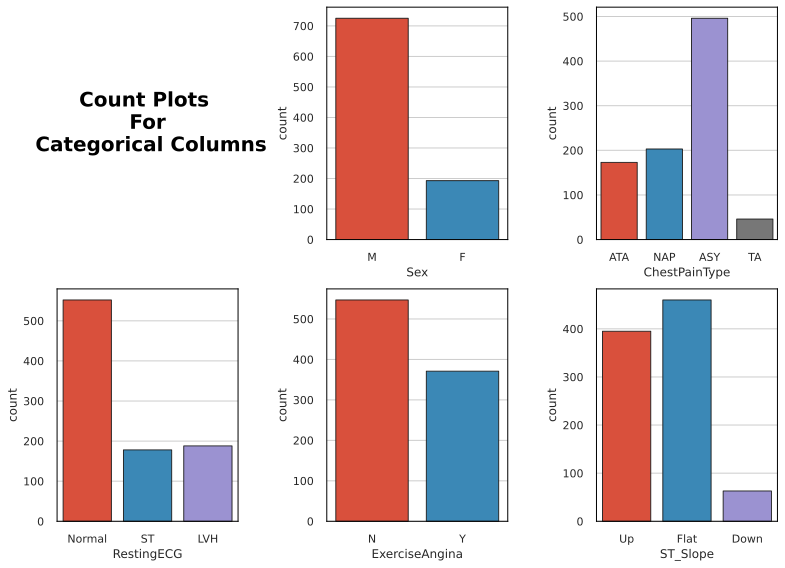

In [42]:
plt.figure(figsize=(11,8))

ax = plt.subplot(2,3,1)
ax.text(0.5, 0.5, "Count Plots \n For \n Categorical Columns", fontdict={'fontsize': 20, 'fontweight': 'bold', 'color': 'black', 'ha': 'center', 'va': 'center'})
ax.axis('off')

for c, i in enumerate(range(2, 7)):
    plt.subplot(2,3,i)
    cat = cat_cols[c]
    sns.countplot(x = cat , data = df, saturation =0.9, linewidth = 0.9, edgecolor = 'k')



plt.tight_layout()
plt.show()

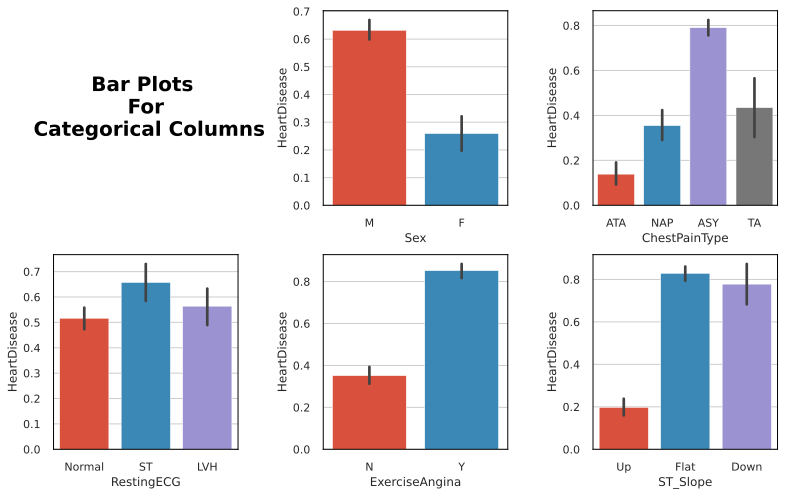

In [43]:
plt.figure(figsize=(11,7))

ax = plt.subplot(2,3,1)
ax.text(0.5, 0.5, "Bar Plots \n For \n Categorical Columns", fontdict={'fontsize': 20, 'fontweight': 'bold', 'color': 'black', 'ha': 'center', 'va': 'center'})
ax.axis('off')

for c, i in enumerate(range(2, 7)):
    plt.subplot(2,3,i)
    cat = cat_cols[c]
    sns.barplot(x = cat , y = 'HeartDisease', data = df, saturation =0.9)


plt.tight_layout()
plt.show()

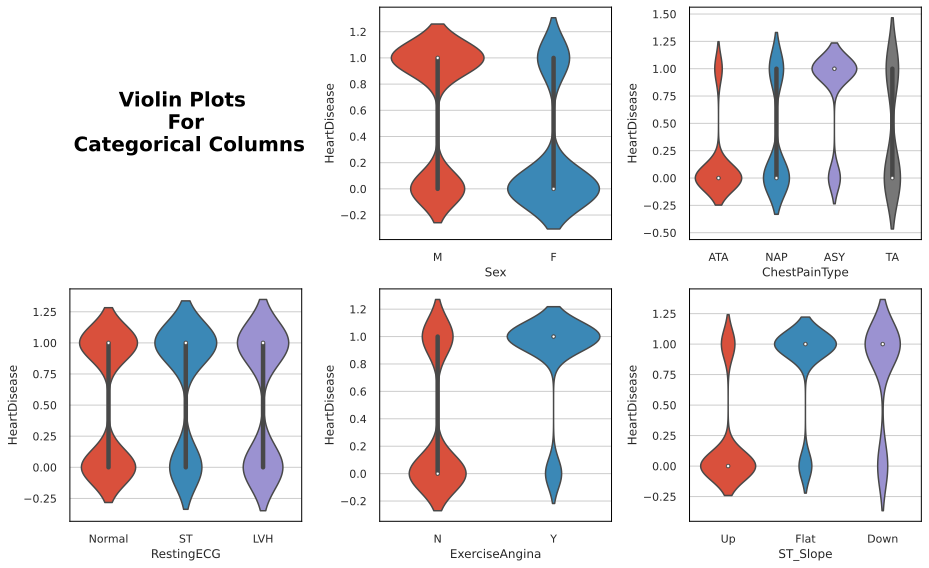

In [44]:
plt.figure(figsize=(13,8))

ax = plt.subplot(2,3,1)
ax.text(0.5, 0.5, "Violin Plots \n For \n Categorical Columns", fontdict={'fontsize': 20, 'fontweight': 'bold', 'color': 'black', 'ha': 'center', 'va': 'center'})
ax.axis('off')

for c, i in enumerate(range(2, 7)):
    plt.subplot(2,3,i)
    cat = cat_cols[c]
    sns.violinplot(x = cat , y = 'HeartDisease', data = df, saturation =0.9)


plt.tight_layout()
plt.show()

let's see boxplots difference Male & Female VS. Numerical Data

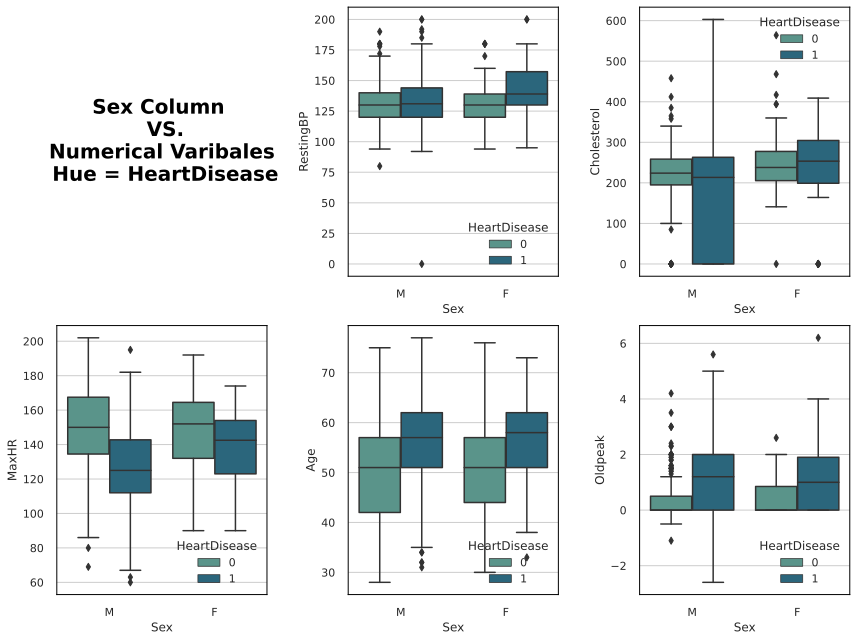

In [45]:
figure = plt.figure(figsize= (12,9))


ax = plt.subplot(2,3,1)
ax.text(0.5, 0.5, "Sex Column \n  VS. \n Numerical Varibales \n Hue = HeartDisease", fontdict={'fontsize': 20, 'fontweight': 'bold', 'color': 'black', 'ha': 'center', 'va': 'center'})
ax.axis('off')


plt.subplot(2,3,2)
sns.boxplot(x = 'Sex',y = 'RestingBP',hue = 'HeartDisease',  data = df, palette = 'crest')

plt.subplot(2,3,3)
sns.boxplot(x = 'Sex',y = 'Cholesterol',hue = 'HeartDisease',  data = df, palette = 'crest')


plt.subplot(2,3,4)
sns.boxplot(x = 'Sex',y = 'MaxHR',hue = 'HeartDisease',  data = df, palette = 'crest')

plt.subplot(2,3,5)
sns.boxplot(x = 'Sex',y = 'Age',hue = 'HeartDisease',  data = df, palette = 'crest')

plt.subplot(2,3,6)
sns.boxplot(x = 'Sex', y = 'Oldpeak', hue = 'HeartDisease', data = df, palette = 'crest')

plt.tight_layout()
plt.show()

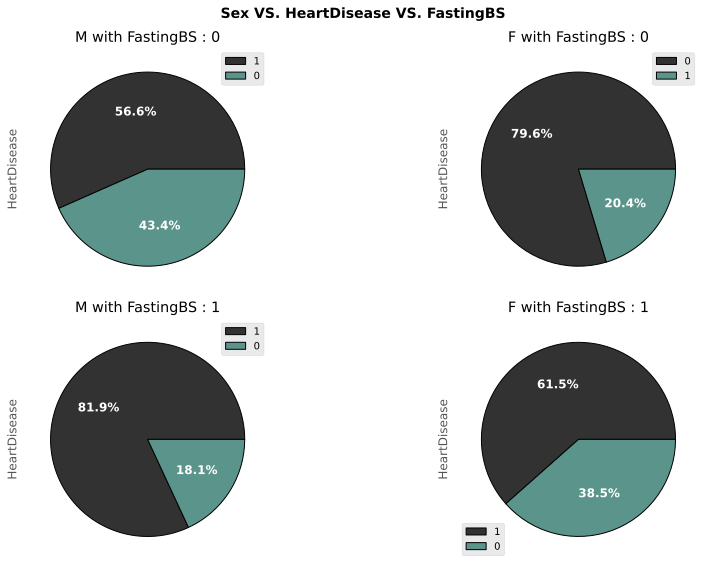

In [23]:
fig = plt.figure(figsize=(14, 8))
subgroups = [('M', 0), ('F', 0), ('M', 1), ('F', 1)]

colors = ["#323232", '#5A948A']

for i, subgroup in enumerate(subgroups):
    sex, fastbs = subgroup
    
    ax = plt.subplot(2, 2, i + 1)
    data = df[(df['Sex'] == sex) & (df['FastingBS'] == fastbs)]
    wedgeprops = {'linewidth': 1, 'edgecolor': 'black'}
    textprops = {'color': 'white', 'fontsize': 12, 'fontweight': 'bold'}
    data['HeartDisease'].value_counts().plot(kind='pie', colors=colors, wedgeprops=wedgeprops, textprops=textprops, autopct='%1.1f%%')

    plt.title(f'{sex} with FastingBS : {fastbs}')

    plt.legend()

fig.suptitle("Sex VS. HeartDisease VS. FastingBS", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## <b id = "#2.2">2.2 <span style='color:#F0BA7C'>|</span> Numerical Variables </b>


In [11]:
num_cols = [ df.columns[i] for i, j in enumerate(df.dtypes) if j != 'object']
num_cols

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease']

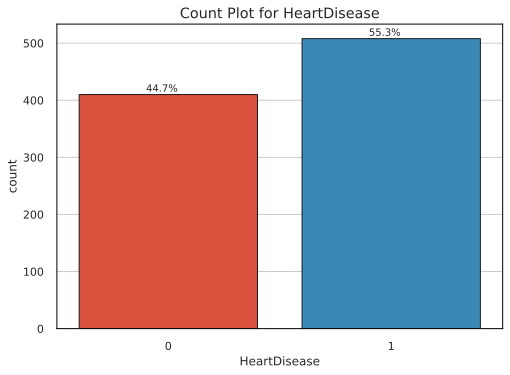

In [46]:
plt.title("Count Plot for HeartDisease")
ax = sns.countplot(x = 'HeartDisease', data = df, linewidth = 1, edgecolor = 'k', alpha = 1, saturation =0.9)

for p in ax.patches:
    per = round( (p.get_height()/df.shape[0])*100 , 1)
    x = p.get_x()+ 0.3
    y = p.get_height() + 5
    ax.annotate(f'{per}%', (x, y ))


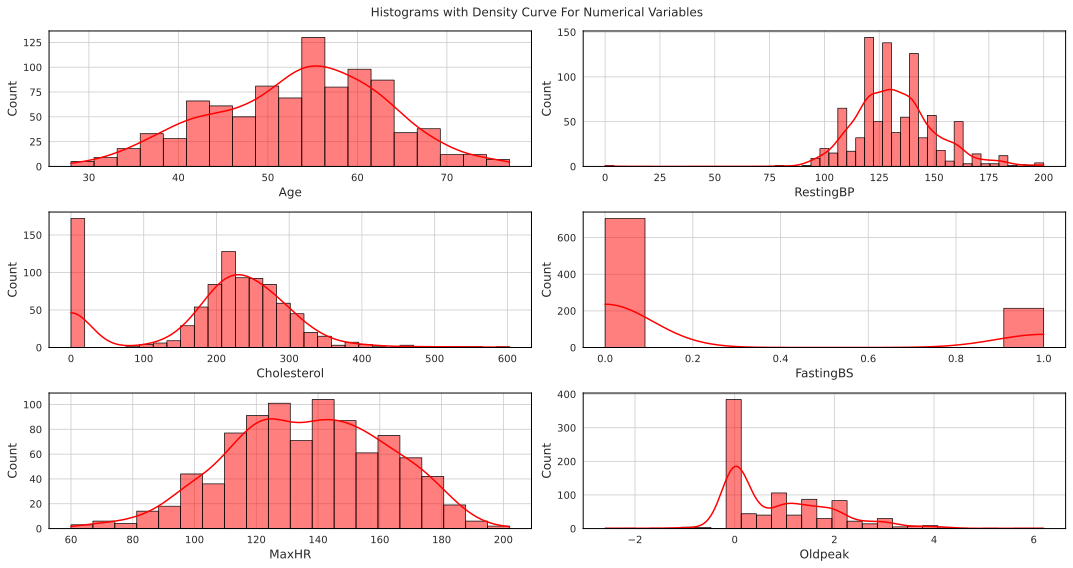

In [16]:
fig, axes = plt.subplots(3,2 , figsize = (15,8))

for i, ax in enumerate(axes.flatten()):
    sns.histplot(x = df[num_cols[i]], kde = True, linewidth = 0.7 ,  edgecolor = 'k', color = 'red',  ax = ax)
fig.suptitle("Histograms with Density Curve For Numerical Variables")
plt.tight_layout()

In [45]:
sns.pairplot(data=df,hue='HeartDisease', palette = ['#ffb400','#9080ff'])

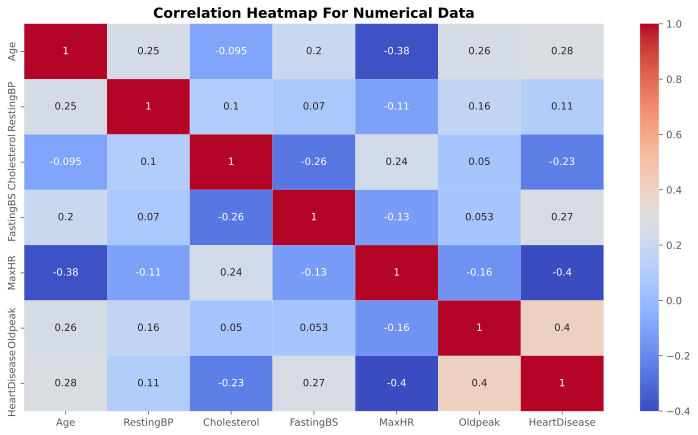

In [20]:
plt.figure(figsize = (13,7))
sns.heatmap(df[num_cols].corr(), annot = True, cmap = 'coolwarm')
plt.title("Correlation Heatmap For Numerical Data", fontsize = '14', fontweight= 'bold')
plt.show()

## <b id = "#2.3">2.3 <span style='color:#F0BA7C' >|</span> Outliers Detections </b>

Let's First split our df to train, test splits to avoid data leakage problems and try these methods on our train set only

In [17]:
X = df.drop('HeartDisease', axis = 1)
y = df.HeartDisease

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.3 ,stratify = y, random_state = 42)

<hr >

### #experiment 1

In [6]:
num2_cols = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

In [20]:
#ref: https://www.kaggle.com/code/rpsuraj/outlier-detection-techniques-simplified#Types-of-outliers:
def out_iqr(df):
    out_dict = {}
    for column in df.columns:
        q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
        # calculate the IQR
        iqr = q75 - q25
        # calculate the outlier cutoff
        cut_off = iqr * 1.5
        # calculate the lower and upper bound value
        lower, upper = q25 - cut_off, q75 + cut_off
        # Calculate the number of records below and above lower and above bound value respectively
        df1 = df[df[column] > upper]
        df2 = df[df[column] < lower]
        out_dict[column] = {'IQR': iqr, 'Lower Bound': lower, 'Upper Bound': upper, 'Outliers': df1.shape[0]+ df2.shape[0]}
    return pd.DataFrame.from_dict(out_dict, orient='index')


In [21]:
df_out = out_iqr(X_train[num2_cols])

df_out

IQR  Lower Bound  Upper Bound  Outliers
Age          13.75       26.625       81.625         0
RestingBP    20.00       90.000      170.000        18
Cholesterol  88.50       47.500      401.500       121
FastingBS     0.00        0.000        0.000       143
MaxHR        37.00       62.500      210.500         0
Oldpeak       1.50       -2.250        3.750        12

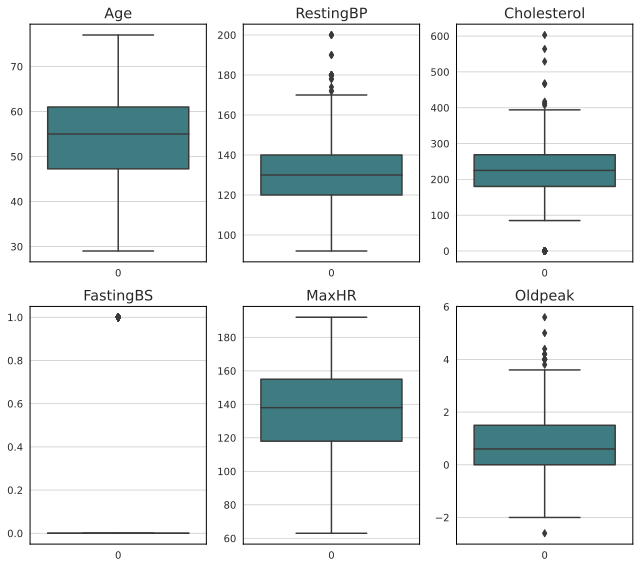

In [26]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(9, 8))

for i, ax in enumerate(axs.flatten()):
    col = num2_cols[i]
    ax = sns.boxplot(X_train[col] ,  ax = ax , palette = 'crest' )
    ax.set_title(f"{col}")
plt.tight_layout()
plt.show()


### #expierment 2

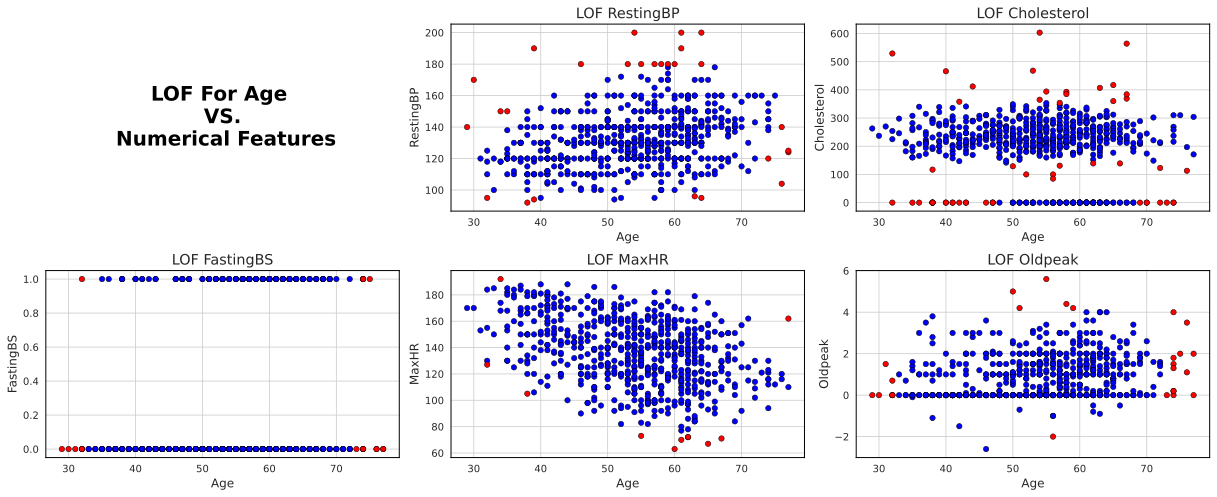

In [28]:
yys = ['RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
fig = plt.figure(figsize=(17, 7))
ax = plt.subplot(2, 3, 1)
ax.text(0.5, 0.5, "LOF For Age \n VS. \n Numerical Features", fontdict={'fontsize': 20, 'fontweight': 'bold', 'color': 'black', 'ha': 'center', 'va': 'center'})
ax.axis('off')
for i in range(len(yys)):
    col = yys[i]
    clf = LocalOutlierFactor(n_neighbors=50, contamination='auto')
    X = X_train[['Age', col]].values
    y_pred = clf.fit_predict(X)
    # plot the level sets of the decision function

    in_mask = [True if l == 1 else False for l in y_pred]
    out_mask = [True if l == -1 else False for l in y_pred]

    ax = plt.subplot(2, 3, i+2)
    ax.set_title(f"LOF {col}")
    # inliers
    ax.scatter(X[in_mask, 0], X[in_mask, 1], c='blue',
               edgecolor='k', s=30)
    # outliers
    ax.scatter(X[out_mask, 0], X[out_mask, 1], c='red',
               edgecolor='k', s=30)
    ax.set_xlabel('Age')
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()


## <b id = "#2.4" >2.4 <span style='color:#F0BA7C'>|</span> PCA </b>


In [30]:
X_train[num2_cols]

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak
335   62        120            0          1    134     -0.8
368   57        140            0          0    120      2.0
111   57        150          255          0     92      3.0
336   72        160            0          0    114      1.6
479   56        170            0          0    123      2.5
..   ...        ...          ...        ...    ...      ...
405   35        120            0          1    130      1.2
438   63        130            0          0    111      0.0
93    48        160          329          0     92      1.5
722   60        150          258          0    157      2.6
62    45        140          224          0    144      0.0

[642 rows x 6 columns]

In [31]:
scaler = StandardScaler()

df_std = pd.DataFrame(scaler.fit_transform(X_train[num2_cols]), columns = X_train[num2_cols].columns)

In [32]:
df_std

Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak
0    0.856064  -0.672618    -1.882352   1.868023 -0.082372 -1.563271
1    0.331343   0.435467    -1.882352  -0.535325 -0.629164  1.037503
2    0.331343   0.989510     0.489677  -0.535325 -1.722749  1.966351
3    1.905508   1.543553    -1.882352  -0.535325 -0.863504  0.665964
4    0.226399   2.097596    -1.882352  -0.535325 -0.511994  1.501927
..        ...        ...          ...        ...       ...       ...
637 -1.977432  -0.672618    -1.882352   1.868023 -0.238598  0.294425
638  0.961009  -0.118576    -1.882352  -0.535325 -0.980673 -0.820193
639 -0.613156   1.543553     1.178031  -0.535325 -1.722749  0.573079
640  0.646176   0.989510     0.517584  -0.535325  0.815930  1.594812
641 -0.927989   0.435467     0.201313  -0.535325  0.308194 -0.820193

[642 rows x 6 columns]

In [33]:
pca = PCA(n_components=2) # project from 784 to 2 dimension = pca.fit_transform(df_std)
principalComponents = pca.fit_transform(df_std)
principal_df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principal_df.shape

(642, 2)

In [34]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.30459346 0.22150369]


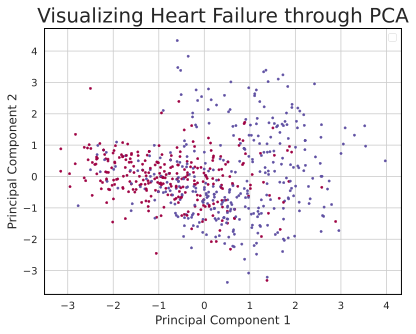

In [35]:
plt.title('Visualizing Heart Failure through PCA', fontsize=20);
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], s= 5, c= y_train, cmap='Spectral')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

## <b id = "#2.4" >2.5 <span style='color:#F0BA7C'>|</span> TSNE </b>

In [39]:
tsne = TSNE(n_components=2 , verbose = 0, random_state = 42 ).fit_transform(X_train[num2_cols])

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


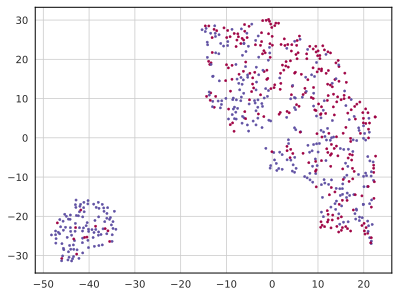

In [40]:
plt.scatter(tsne[:, 0], tsne[:, 1], s= 5, c=y_train, cmap='Spectral')


reduce using pca and then pass it to TSNE object!

In [43]:
pca_comp = PCA().fit_transform(df_std)

In [44]:
pca_comp

array([[ 1.14136533,  2.75976636, -0.62575102,  0.76392696,  0.60181495,
        -0.64208033],
       [ 1.33457812,  0.28570715,  0.38255257, -0.80588677, -1.56603892,
        -0.70035376],
       [ 1.61151567, -1.78738314,  0.68955809, -0.93692298, -0.65510911,
         0.93566521],
       ...,
       [ 0.64279239, -1.6989141 , -0.61781424, -0.56925502, -0.58134517,
         1.84008965],
       [ 0.32854184, -1.88749243,  0.63083688,  0.43946635, -0.46965634,
        -0.82345299],
       [-1.04133523, -0.03636916, -0.85285873,  0.05175357, -0.47316931,
         0.32551183]])

In [45]:
tsne = TSNE(n_components=2 , verbose = 0, random_state = 42).fit_transform(pca_comp)

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


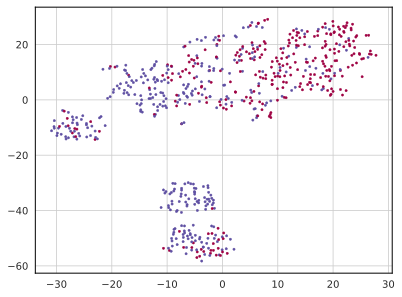

In [46]:
plt.scatter(tsne[:, 0], tsne[:, 1], s= 5, c= y_train, cmap='Spectral')


/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


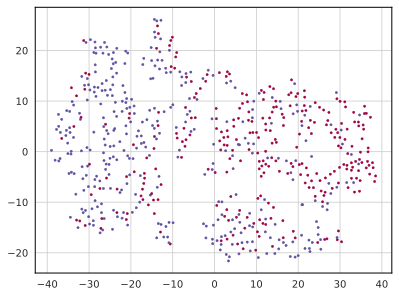

In [67]:
df_std_2 = df_std.drop(['Cholesterol', 'FastingBS'], axis = 1)
pca_comp = PCA().fit_transform(df_std_2)
tsne = TSNE(n_components=2 ,learning_rate = 30,  verbose = 0, random_state = 42, n_iter = 10000, init = 'pca').fit_transform(pca_comp)
plt.scatter(tsne[:, 0], tsne[:, 1], s= 5, c= y_train, cmap='Spectral')


/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


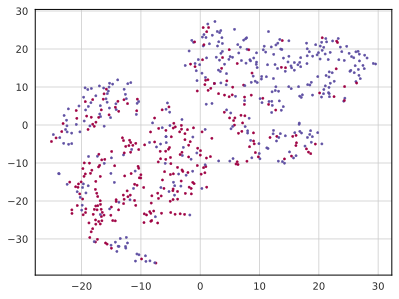

In [81]:
df_std_2 = df_std.drop(['Cholesterol', 'FastingBS'], axis = 1)
pca_comp = PCA().fit_transform(df_std_2)
tsne = TSNE(n_components=2 ,learning_rate = 50,  verbose = 0, random_state = 42).fit_transform(pca_comp)
plt.scatter(tsne[:, 0], tsne[:, 1], s= 5, c= y_train, cmap='Spectral')


now I will encode categorical data and apply the same method I used after made training sets and testing sets

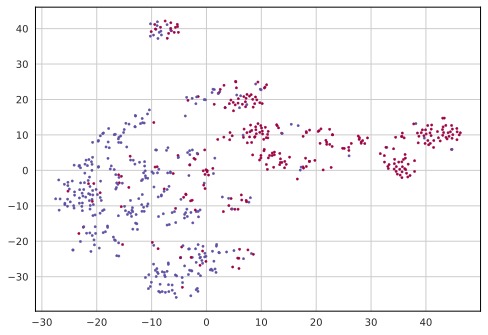

In [91]:
from sklearn.manifold import TSNE

cat_cols = [ col for col in df.columns if df[col].dtype == 'object']
num_cols = [ col for col in df.columns if df[col].dtype != 'object']

df_cat_enc = pd.get_dummies(df[cat_cols], drop_first = True)

df_rf = pd.concat([df_cat_enc , df[num_cols] ], axis = 1)


X = df_rf.drop('HeartDisease', axis = 1)
y = df_rf.HeartDisease

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.3 , random_state  = 42)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)






testing = pd.DataFrame( X_train, columns = df_rf.columns[:15])
pca = PCA()
pca_comp = pca.fit_transform(testing)
tsne = TSNE(n_components=2 ,  verbose = 0, random_state = 42, init = 'pca').fit_transform(pca_comp)
plt.scatter(tsne[:, 0], tsne[:, 1], s= 5, c= y_train, cmap='Spectral')


# <b id = "3" >3 <span style='color:#F0BA7C'>|</span> Feature Selection </b>


prepare data for RFE class, Encoding Categorical Features and remove high correlated features

In [97]:
df_cat_enc = pd.get_dummies(df[cat_cols])

<AxesSubplot:>

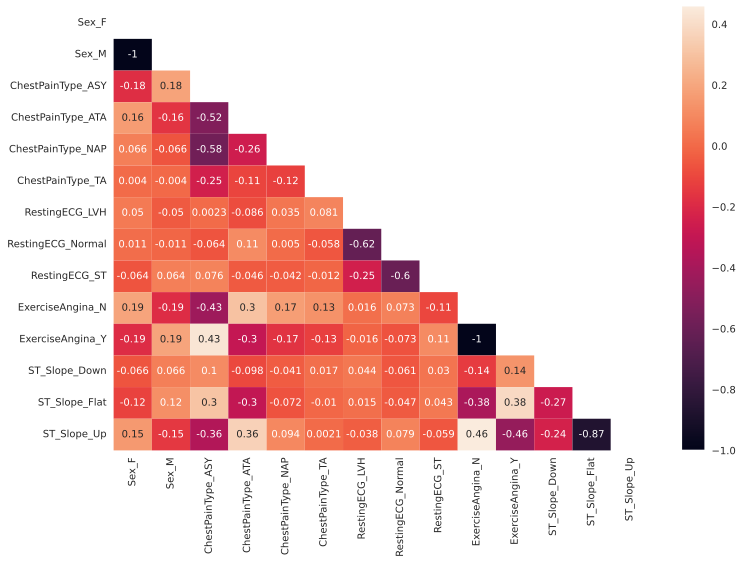

In [98]:
df_cat_enc = pd.get_dummies(df[cat_cols])


plt.figure(figsize = (12,8))
corr = pd.get_dummies(df[cat_cols]).corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(pd.get_dummies(corr), mask = mask ,annot = True)

<AxesSubplot:>

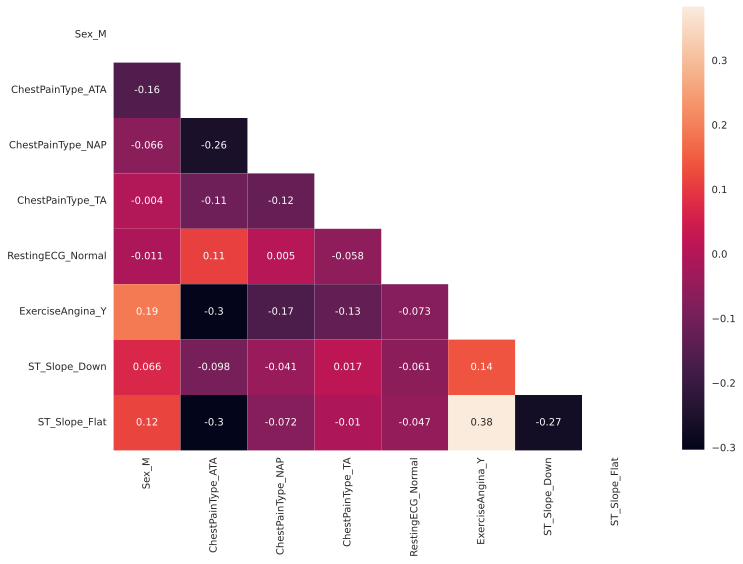

In [100]:
df_cat_enc.drop(['Sex_F', 'ST_Slope_Up', 'ExerciseAngina_N', 'ChestPainType_ASY', 'RestingECG_LVH','RestingECG_ST' ,'ExerciseAngina_N', 'ST_Slope_Up'], axis = 1 , inplace = True)

plt.figure(figsize = (12,8))
corr = df_cat_enc.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(pd.get_dummies(corr), mask = mask ,annot = True)

In [117]:
df_rfe = pd.concat([df[num_cols], df_cat_enc], axis = 1)

X = df_rfe.drop('HeartDisease', axis = 1)
y = df_rfe['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.3, random_state = 42)


scaler = RobustScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)


rfe = RFE(RandomForestClassifier(random_state = 42), n_features_to_select=6 )

rfe.fit(X,y)

cols = X.columns[rfe.support_]


X_train = X_train[cols]
X_test = X_test[cols]



models = [ RandomForestClassifier(random_state = 42), SVC() , LogisticRegression()]

print(f"RFE Results: {cols}")
print()
for model in models:
    print(model)
    model.fit(X_train , y_train)
    print( f"The Accuracy on training set: {model.score(X_train, y_train)}" )
    print(f"The Accuracy on testing  set: {model.score(X_test, y_test)}")
    
    print()

RFE Results: Index(['Age', 'Cholesterol', 'MaxHR', 'Oldpeak', 'ExerciseAngina_Y',
       'ST_Slope_Flat'],
      dtype='object')

RandomForestClassifier(random_state=42)
The Accuracy on training set: 1.0
The Accuracy on testing  set: 0.8369565217391305

SVC()
The Accuracy on training set: 0.8566978193146417
The Accuracy on testing  set: 0.8478260869565217

LogisticRegression()
The Accuracy on training set: 0.8426791277258567
The Accuracy on testing  set: 0.8260869565217391



In [126]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80       112
           1       0.87      0.85      0.86       164

    accuracy                           0.84       276
   macro avg       0.83      0.83      0.83       276
weighted avg       0.84      0.84      0.84       276



In [ ]:
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

In [127]:
rf.score(X_train, y_train)

1.0

In [128]:
rf.score(X_test, y_test)

0.8369565217391305

# <b id = "#4">4 <span style='color:#F0BA7C'>|</span> Modeling </b>


## <b id = "#4.1">4.1 <span style='color:#F0BA7C'>|</span> Modeling Using Pycaret </b>

In [118]:
s = setup(df, target = 'HeartDisease', session_id = 41)
best = compare_models()

Processing:   0%|          | 0/69 [00:00<?, ?it/s]

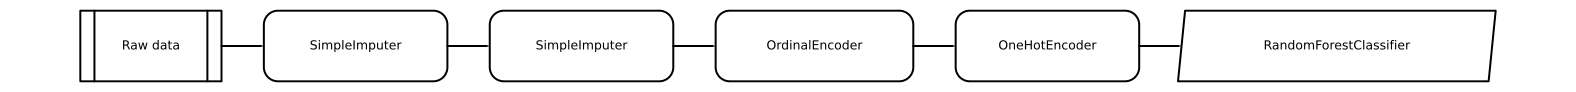

In [120]:
evaluate_model(best)

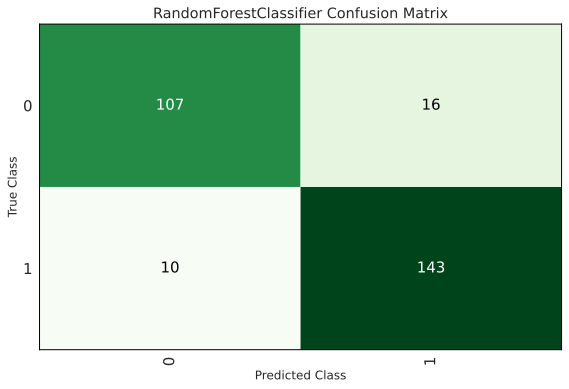

In [121]:
plot_model(best, plot = 'confusion_matrix')

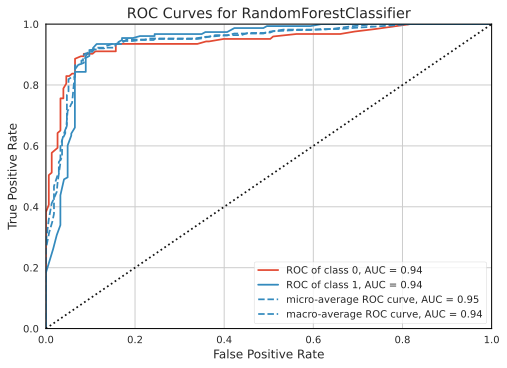

In [123]:
plot_model(best, plot = 'auc')

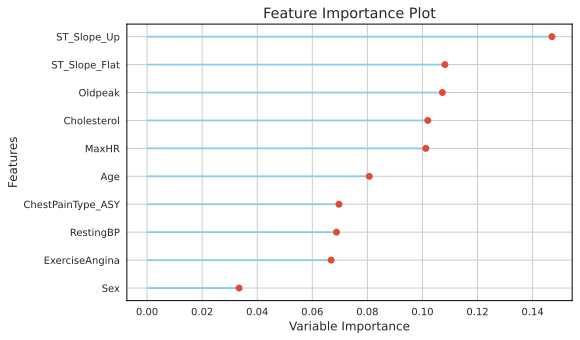

In [122]:
plot_model(best, plot = 'feature')

In [ ]:
tuned = tune_model(best, n_iter = 50 ) #and so on check the documentation..

## <b id = "#4.2">4.2 <span style='color:#F0BA7C'>|</span> Modeling Using Sklearn </b>

In [24]:
X = df.drop('HeartDisease', axis = 1)
y = df.HeartDisease

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.3 , random_state  = 42)


cat_cols = [ col for col in df.columns if df[col].dtype == 'object']
num_cols = [ col for col in df.columns if df[col].dtype != 'object']

In [28]:
df_cat_enc = pd.get_dummies(df[cat_cols], drop_first = True)

df_m = pd.concat([df_cat_enc , df[num_cols] ], axis = 1)

X = df_m.drop('HeartDisease', axis = 1)
y = df_m.HeartDisease

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.3 , random_state  = 42)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


models = [ RandomForestClassifier(random_state = 42), SVC() , LogisticRegression(), KNeighborsClassifier()]



for model in models:
    print(model)
    model.fit(X_train , y_train)
    print( f"The Accuracy on training set: {model.score(X_train, y_train)}" )
    print(f"The Accuracy on testing  set: {model.score(X_test, y_test)}")
    print("_____________________________________________________________________________________")
    print()

RandomForestClassifier(random_state=42)
The Accuracy on training set: 1.0
The Accuracy on testing  set: 0.8840579710144928
_____________________________________________________________________________________

SVC()
The Accuracy on training set: 0.9049844236760125
The Accuracy on testing  set: 0.8840579710144928
_____________________________________________________________________________________

LogisticRegression()
The Accuracy on training set: 0.8613707165109035
The Accuracy on testing  set: 0.8804347826086957
_____________________________________________________________________________________

KNeighborsClassifier()
The Accuracy on training set: 0.8940809968847352
The Accuracy on testing  set: 0.8695652173913043
_____________________________________________________________________________________



we may try to make it simpler and tyr different parameters to get a good generalization & cross validation..

In [29]:
cross_val_score(LogisticRegression(), X_train, y_train, cv = 10)

array([0.83076923, 0.90769231, 0.890625  , 0.84375   , 0.84375   ,
       0.921875  , 0.71875   , 0.875     , 0.859375  , 0.84375   ])

# <b id = "#5">5 <span style='color:#F0BA7C'>|</span> Model Explainability </b>

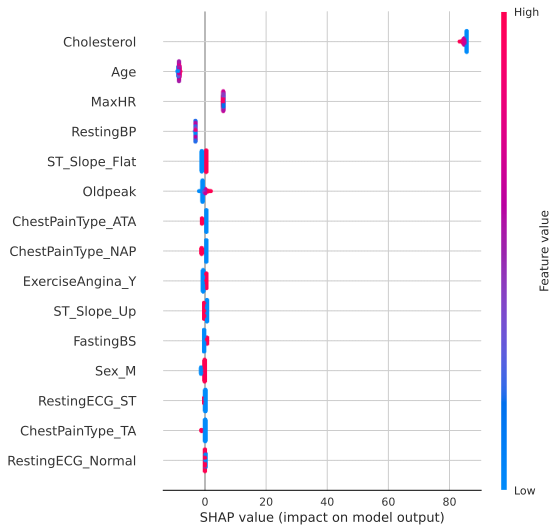

In [33]:
model = LogisticRegression()
model.fit(X_train, y_train)

feature_names = X.columns
# Create SHAP explainer object
explainer = shap.Explainer(model, X)

# Calculate SHAP values for all instances in the test set
shap_values = explainer(X_train)

# Plot summary plot of feature importance
shap.summary_plot(shap_values, X_train, feature_names=feature_names)

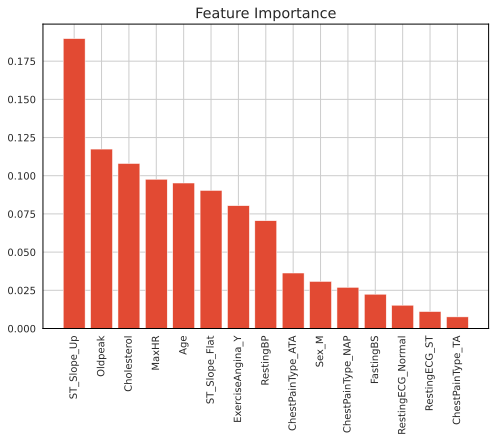

In [42]:
# Get feature importances

model = RandomForestClassifier()

model.fit(X_train, y_train)


importances = model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [feature_names[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_train.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)

# Show plot
plt.show()

we see different Explains for different models!

# <b id = "#5">6 <span style='color:#F0BA7C'>|</span> Ending </b>

In this notebook, I have experimented with various techniques to enhance my skills. I welcome any advice or feedback in the comment section.

If you're interested in learning more about the topics covered in this notebook, I recommend checking out the following resources:

* Feature Selection and Data Visualization by Kanncaa1 on Kaggle: https://www.kaggle.com/code/kanncaa1/feature-selection-and-data-visualization
* Visualizing Kannada MNIST with PCA by Parul Pandey on Kaggle: https://www.kaggle.com/code/parulpandey/part1-visualizing-kannada-mnist-with-pca
* Simplified Outlier Detection Techniques by rpsuraj on Kaggle: https://www.kaggle.com/code/rpsuraj/outlier-detection-techniques-simplified
* Understand ANY Machine Learning Model by CodeEmporium: https://www.youtube.com/watch?v=IqT551LjKHw
